<a href="https://colab.research.google.com/github/aleszcz/Aleks_portfolio/blob/main/Single%20Cell%20RNA%20analysis_lung%20sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#singel Cell data analysis COVID LUNG samples



In [1]:
!pip install scanpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.1/122.1 kB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 9.4 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=78160ddabcd74375fce9702837964ad656330247f595f66d0e7e7d38fb54ef65
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8026 sha256=3cbaa27cddec154110916d04e1956bc87358963a13bfcab68937f08f97d4dd4d
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9b

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, accuracy_score


In [3]:
data = pd.read_csv('/content/GSM5226574_C51ctr_raw_counts.csv')
data.head(31)

,Unnamed: 0,TAGGTACCATGGCCAC-1_1,ATTCACTGTAACAGGC-1_1,TAACTTCCAACCACGC-1_1,TTGGGTACACGACAAG-1_1,AGGCCACAGAGTCACG-1_1,CACTGAAGTCGAAGCA-1_1,ACTGATGTCTGCACCT-1_1,TTACCGCCACTCAGAT-1_1,TTGGTTTTCCTAGCTC-1_1,...,AAGTCGTGTGTGAATA-1_1,GTCGTTCTCCAAGGGA-1_1,GTTTGGATCGGCCTTT-1_1,GTACAGTCACGTATAC-1_1,TCATGCCCAAGAGGTC-1_1,CGCCATTGTTTGCCGG-1_1,CACTGGGGTCTACGTA-1_1,CATACTTGTAGAGGAA-1_1,TTTGGTTTCCACGGAC-1_1,ATGCATGAGTCATGAA-1_1
0,AL627309.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,AL627309.5,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,AL627309.4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,AL669831.2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,LINC01409,1,0,2,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,FAM87B,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,LINC01128,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,LINC00115,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,FAM41C,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,AL645608.6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Import the necessary libraries
import scanpy as sc


In [5]:
adata = sc.read_csv('/content/GSM5226574_C51ctr_raw_counts.csv')


In [6]:
adata

AnnData object with n_obs × n_vars = 34546 × 6099

In [7]:
adata = adata.T

In [8]:
adata.X.shape

(6099, 34546)

In [9]:
#adata.obs
#adata.var
adata.X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [10]:
adata.var

""
AL627309.1
AL627309.5
AL627309.4
AL669831.2
LINC01409
...
VN1R2
AL031676.1
SMIM34A
AL050402.1


In [11]:
adata.var['mt'] = adata.var.index.str.startswith('MT-')

In [12]:
adata.var

,mt
AL627309.1,False
AL627309.5,False
AL627309.4,False
AL669831.2,False
LINC01409,False
...,...
VN1R2,False
AL031676.1,False
SMIM34A,False
AL050402.1,False


In [13]:
import pandas as pd

In [14]:
ribo_url = "http://software.broadinstitute.org/gsea/msigdb/download_geneset.jsp?geneSetName=KEGG_RIBOSOME&fileType=txt"

In [15]:
ribo_genes = pd.read_table(ribo_url, skiprows=2, header = None)
ribo_genes

,0
0,FAU
1,MRPL13
2,RPL10
3,RPL10A
4,RPL10L
...,...
83,RPS9
84,RPSA
85,RSL24D1
86,RSL24D1P11


In [16]:
ribo_genes[0].values

array(['FAU', 'MRPL13', 'RPL10', 'RPL10A', 'RPL10L', 'RPL11', 'RPL12',
       'RPL13', 'RPL13A', 'RPL14', 'RPL15', 'RPL17', 'RPL18', 'RPL18A',
       'RPL19', 'RPL21', 'RPL22', 'RPL22L1', 'RPL23', 'RPL23A', 'RPL24',
       'RPL26', 'RPL26L1', 'RPL27', 'RPL27A', 'RPL28', 'RPL29', 'RPL3',
       'RPL30', 'RPL31', 'RPL32', 'RPL34', 'RPL35', 'RPL35A', 'RPL36',
       'RPL36A', 'RPL36AL', 'RPL37', 'RPL37A', 'RPL38', 'RPL39', 'RPL3L',
       'RPL4', 'RPL41', 'RPL5', 'RPL6', 'RPL7', 'RPL7A', 'RPL8', 'RPL9',
       'RPLP0', 'RPLP1', 'RPLP2', 'RPS10', 'RPS11', 'RPS12', 'RPS13',
       'RPS15', 'RPS15A', 'RPS16', 'RPS17', 'RPS18', 'RPS19', 'RPS2',
       'RPS20', 'RPS21', 'RPS23', 'RPS24', 'RPS25', 'RPS26', 'RPS27',
       'RPS27A', 'RPS27L', 'RPS28', 'RPS29', 'RPS3', 'RPS3A', 'RPS4X',
       'RPS4Y1', 'RPS5', 'RPS6', 'RPS7', 'RPS8', 'RPS9', 'RPSA',
       'RSL24D1', 'RSL24D1P11', 'UBA52'], dtype=object)

In [17]:
adata.var['ribo'] = adata.var_names.isin(ribo_genes[0].values)

In [18]:
adata.var

,mt,ribo
AL627309.1,False,False
AL627309.5,False,False
AL627309.4,False,False
AL669831.2,False,False
LINC01409,False,False
...,...,...
VN1R2,False,False
AL031676.1,False,False
SMIM34A,False,False
AL050402.1,False,False


In [19]:
adata.obs

""
TAGGTACCATGGCCAC-1_1
ATTCACTGTAACAGGC-1_1
TAACTTCCAACCACGC-1_1
TTGGGTACACGACAAG-1_1
AGGCCACAGAGTCACG-1_1
...
CGCCATTGTTTGCCGG-1_1
CACTGGGGTCTACGTA-1_1
CATACTTGTAGAGGAA-1_1
TTTGGTTTCCACGGAC-1_1


In [20]:
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt', 'ribo'], percent_top=None, log1p=False, inplace=True)

In [21]:
adata.var

,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
AL627309.1,False,False,8,0.001312,99.868831,8.0
AL627309.5,False,False,33,0.005411,99.458928,33.0
AL627309.4,False,False,4,0.000656,99.934415,4.0
AL669831.2,False,False,2,0.000328,99.967208,2.0
LINC01409,False,False,274,0.048697,95.507460,297.0
...,...,...,...,...,...,...
VN1R2,False,False,0,0.000000,100.000000,0.0
AL031676.1,False,False,0,0.000000,100.000000,0.0
SMIM34A,False,False,0,0.000000,100.000000,0.0
AL050402.1,False,False,0,0.000000,100.000000,0.0


In [22]:
adata.var.sort_values('n_cells_by_counts')

,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
AL445072.1,False,False,0,0.000000,100.000000,0.0
AC073270.1,False,False,0,0.000000,100.000000,0.0
AC073349.5,False,False,0,0.000000,100.000000,0.0
AC005482.1,False,False,0,0.000000,100.000000,0.0
SPDYE8P,False,False,0,0.000000,100.000000,0.0
...,...,...,...,...,...,...
AKAP13,False,False,4458,3.054271,26.906050,18628.0
NEAT1,False,False,4546,5.314150,25.463191,32411.0
MBNL1,False,False,4554,2.877029,25.332022,17547.0
ZBTB20,False,False,4699,2.601082,22.954583,15864.0


In [23]:
sc.pp.filter_genes(adata, min_cells=3)

In [24]:
adata.var.sort_values('n_cells_by_counts')

,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells
AL929091.1,False,False,3,0.000492,99.950812,3.0,3
AC006441.3,False,False,3,0.000492,99.950812,3.0,3
AC022017.1,False,False,3,0.000492,99.950812,3.0,3
AC024597.1,False,False,3,0.000492,99.950812,3.0,3
PCARE,False,False,3,0.000492,99.950812,3.0,3
...,...,...,...,...,...,...,...
AKAP13,False,False,4458,3.054271,26.906050,18628.0,4458
NEAT1,False,False,4546,5.314150,25.463191,32411.0,4546
MBNL1,False,False,4554,2.877029,25.332022,17547.0,4554
ZBTB20,False,False,4699,2.601082,22.954583,15864.0,4699


In [25]:
adata.obs

,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
TAGGTACCATGGCCAC-1_1,6764,24256.0,153.0,0.630772,55.0,0.226748
ATTCACTGTAACAGGC-1_1,6686,19020.0,404.0,2.124080,115.0,0.604627
TAACTTCCAACCACGC-1_1,5158,15645.0,221.0,1.412592,211.0,1.348674
TTGGGTACACGACAAG-1_1,4900,15220.0,3.0,0.019711,5.0,0.032852
AGGCCACAGAGTCACG-1_1,5544,13217.0,417.0,3.155028,82.0,0.620413
...,...,...,...,...,...,...
CGCCATTGTTTGCCGG-1_1,355,410.0,3.0,0.731707,0.0,0.000000
CACTGGGGTCTACGTA-1_1,346,403.0,0.0,0.000000,0.0,0.000000
CATACTTGTAGAGGAA-1_1,360,410.0,2.0,0.487805,0.0,0.000000
TTTGGTTTCCACGGAC-1_1,299,405.0,0.0,0.000000,2.0,0.493827


In [26]:
adata.obs.sort_values('total_counts')

,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
TGGTACAGTTGGTGTT-1_1,323,401.0,0.0,0.000000,0.0,0.000000
CTCAACCGTTTGGGAG-1_1,325,401.0,0.0,0.000000,0.0,0.000000
GTCGTTCTCCAAGGGA-1_1,300,401.0,0.0,0.000000,0.0,0.000000
CGAGAAGGTGAACTAA-1_1,308,401.0,0.0,0.000000,0.0,0.000000
CAGGGCTTCATGCGGC-1_1,330,401.0,7.0,1.745636,1.0,0.249377
...,...,...,...,...,...,...
AGGCCACAGAGTCACG-1_1,5544,13217.0,417.0,3.155028,82.0,0.620413
TTGGGTACACGACAAG-1_1,4900,15220.0,3.0,0.019711,5.0,0.032852
TAACTTCCAACCACGC-1_1,5158,15645.0,221.0,1.412592,211.0,1.348674
ATTCACTGTAACAGGC-1_1,6686,19020.0,404.0,2.124080,115.0,0.604627


In [27]:
adata.obs.sort_values('n_genes_by_counts')

,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
TAGGGTTTCTGGCTGG-1_1,276,419.0,1.0,0.238663,1.0,0.238663
CGTGCTTCAAAGGGCT-1_1,277,432.0,41.0,9.490741,0.0,0.000000
TGACAGTTCTAAACGC-1_1,278,414.0,0.0,0.000000,0.0,0.000000
CTCTGGTCACGACGAA-1_1,285,407.0,0.0,0.000000,0.0,0.000000
GTAAGTCGTATCGCGC-1_1,289,430.0,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...
TAACTTCCAACCACGC-1_1,5158,15645.0,221.0,1.412592,211.0,1.348674
CACTGAAGTCGAAGCA-1_1,5487,12725.0,355.0,2.789784,82.0,0.644401
AGGCCACAGAGTCACG-1_1,5544,13217.0,417.0,3.155028,82.0,0.620413
ATTCACTGTAACAGGC-1_1,6686,19020.0,404.0,2.124080,115.0,0.604627


In [ ]:
#sc.pp.filter_cells(adata, min_genes=200)

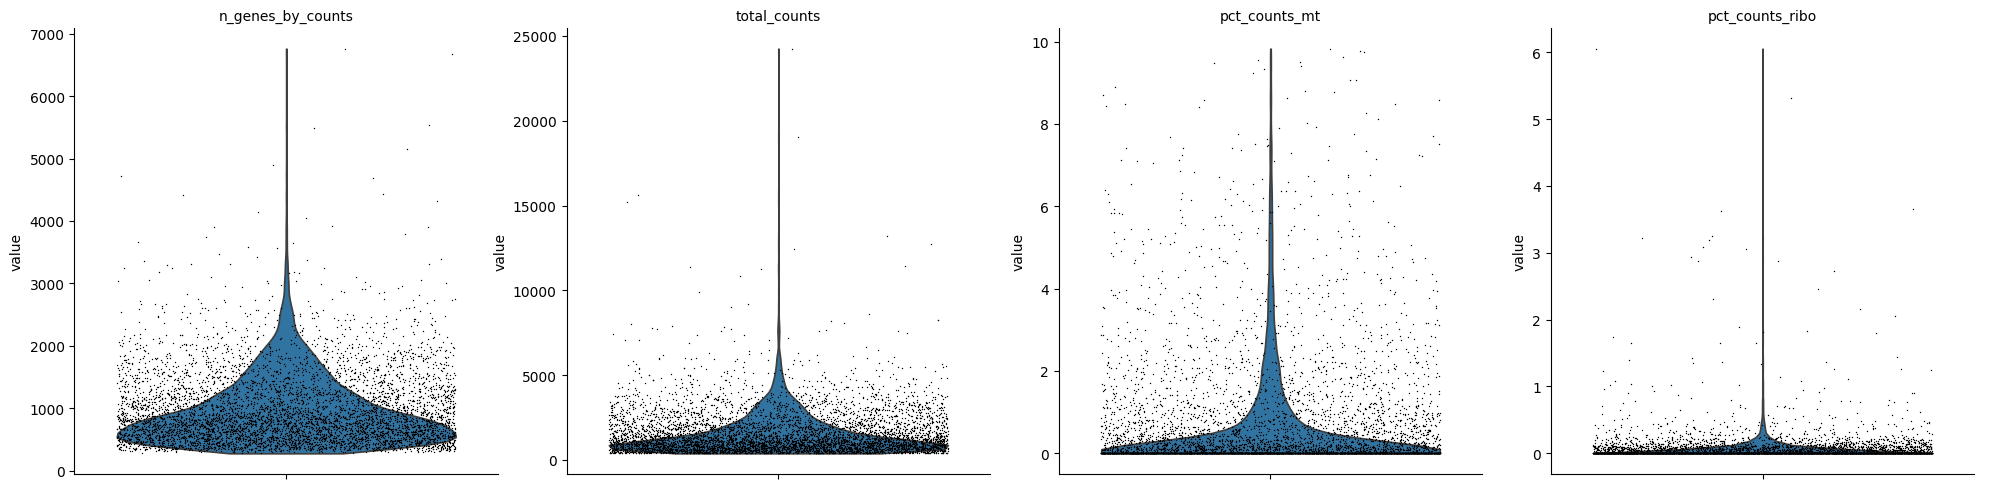

In [28]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo'],
             jitter=0.4, multi_panel=True)

In [29]:
import numpy as np

In [30]:

#calculating percentile

upper_lim = np.quantile(adata.obs.n_genes_by_counts.values, .98)
#upper_lim = 3000

In [31]:
upper_lim

2479.08

In [32]:
adata = adata[adata.obs.n_genes_by_counts < upper_lim]

In [33]:
adata.obs

,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
CGTTCTGGTACTAGCT-1_1,2434,6047.0,6.0,0.099223,1.0,0.016537
CTGGCAGGTTCGGTAT-1_1,2444,5899.0,307.0,5.204272,5.0,0.084760
ACACCAACACAACGCC-1_1,2451,5497.0,0.0,0.000000,3.0,0.054575
CCTCAACCATACAGGG-1_1,2276,5434.0,38.0,0.699301,0.0,0.000000
ACAAAGATCCACAGGC-1_1,2310,5504.0,1.0,0.018169,1.0,0.018169
...,...,...,...,...,...,...
CGCCATTGTTTGCCGG-1_1,355,410.0,3.0,0.731707,0.0,0.000000
CACTGGGGTCTACGTA-1_1,346,403.0,0.0,0.000000,0.0,0.000000
CATACTTGTAGAGGAA-1_1,360,410.0,2.0,0.487805,0.0,0.000000
TTTGGTTTCCACGGAC-1_1,299,405.0,0.0,0.000000,2.0,0.493827


In [34]:
adata = adata[adata.obs.pct_counts_mt < 20]

In [35]:
adata = adata[adata.obs.pct_counts_ribo < 2]

In [36]:
adata

View of AnnData object with n_obs × n_vars = 5960 × 24660
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'

In [ ]:
#Normalizaation

In [37]:
adata.X.sum(axis = 1)

array([6043., 5895., 5496., ...,  410.,  405.,  410.], dtype=float32)

In [38]:
sc.pp.normalize_total(adata, target_sum=1e4) #normalize every cell to 10,000 UMI

/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [39]:
adata.X.sum(axis = 1)

array([10000., 10000., 10000., ..., 10000., 10000., 10000.], dtype=float32)

In [40]:
#freezing the data in the format as it is of now

sc.pp.log1p(adata) #change to log counts

In [41]:
adata.X.sum(axis = 1)

array([3155.047  , 3218.0122 , 3416.0486 , ..., 1191.2708 , 1022.75116,
       1162.8785 ], dtype=float32)

In [42]:
adata.raw = adata

In [43]:
#Clustering
sc.pp.highly_variable_genes(adata, n_top_genes = 2000)

In [44]:
adata.var

,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells,highly_variable,means,dispersions,dispersions_norm
AL627309.1,False,False,8,0.001312,99.868831,8.0,8,False,0.011136,2.697174,1.153160
AL627309.5,False,False,33,0.005411,99.458928,33.0,33,False,0.028855,2.254608,-0.150810
AL627309.4,False,False,4,0.000656,99.934415,4.0,4,False,0.002331,1.702854,-1.776493
LINC01409,False,False,274,0.048697,95.507460,297.0,274,False,0.270478,2.286819,-0.055904
FAM87B,False,False,6,0.000984,99.901623,6.0,6,False,0.006682,1.947490,-1.055700
...,...,...,...,...,...,...,...,...,...,...,...
AL354822.1,False,False,133,0.022627,97.819315,138.0,133,False,0.153974,2.375807,0.206288
AL592183.1,False,False,1003,0.198721,83.554681,1212.0,1003,False,0.875225,2.469386,-0.406744
AC240274.1,False,False,162,0.027382,97.343827,167.0,162,False,0.150268,2.265893,-0.117561
AC007325.4,False,False,4,0.000656,99.934415,4.0,4,False,0.002801,1.579830,-2.138971


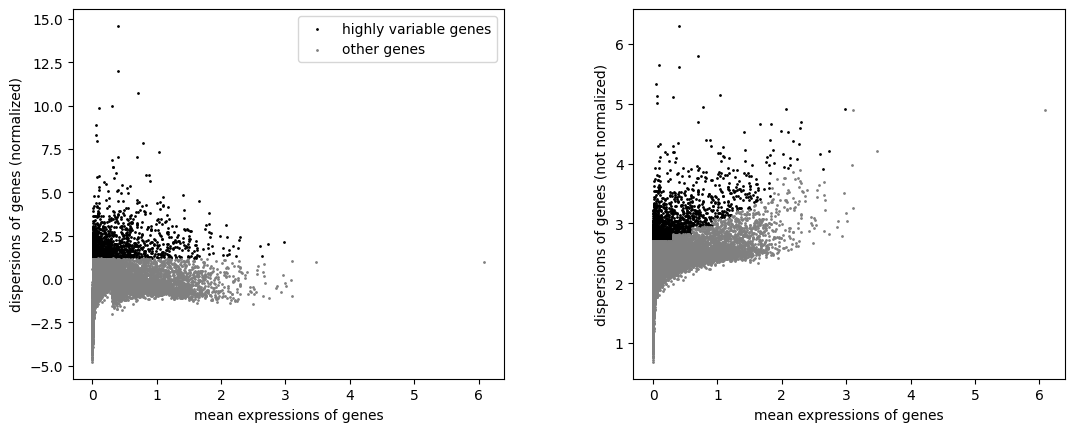

In [45]:
sc.pl.highly_variable_genes(adata)

# reducing the diamention

In [46]:
adata = adata[:, adata.var.highly_variable]

In [47]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt', 'pct_counts_ribo'])

In [48]:
sc.pp.scale(adata, max_value=10)

In [49]:
sc.tl.pca(adata, svd_solver='arpack')

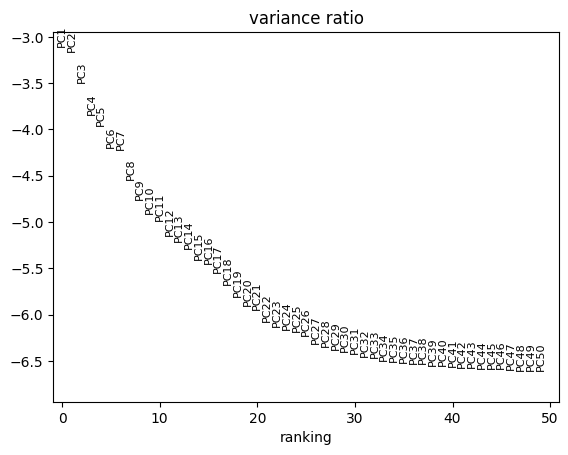

In [50]:
sc.pl.pca_variance_ratio(adata, log=True, n_pcs = 50)

In [51]:
sc.pp.neighbors(adata, n_pcs = 30)

In [52]:
sc.tl.umap(adata)

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


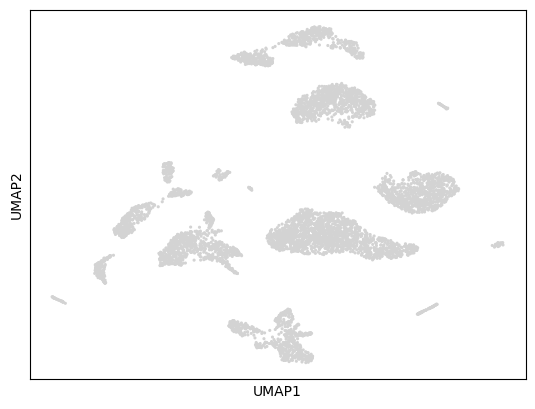

In [53]:
sc.pl.umap(adata)

In [54]:
!pip install leidenalg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 30.8 MB/s eta 0:00:00


In [55]:
sc.tl.leiden(adata, resolution = 0.5)

In [56]:
adata.obs

,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,leiden
CGTTCTGGTACTAGCT-1_1,2434,6047.0,6.0,0.099223,1.0,0.016537,2
CTGGCAGGTTCGGTAT-1_1,2444,5899.0,307.0,5.204272,5.0,0.084760,2
ACACCAACACAACGCC-1_1,2451,5497.0,0.0,0.000000,3.0,0.054575,1
CCTCAACCATACAGGG-1_1,2276,5434.0,38.0,0.699301,0.0,0.000000,11
ACAAAGATCCACAGGC-1_1,2310,5504.0,1.0,0.018169,1.0,0.018169,2
...,...,...,...,...,...,...,...
CGCCATTGTTTGCCGG-1_1,355,410.0,3.0,0.731707,0.0,0.000000,6
CACTGGGGTCTACGTA-1_1,346,403.0,0.0,0.000000,0.0,0.000000,1
CATACTTGTAGAGGAA-1_1,360,410.0,2.0,0.487805,0.0,0.000000,0
TTTGGTTTCCACGGAC-1_1,299,405.0,0.0,0.000000,2.0,0.493827,12


/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


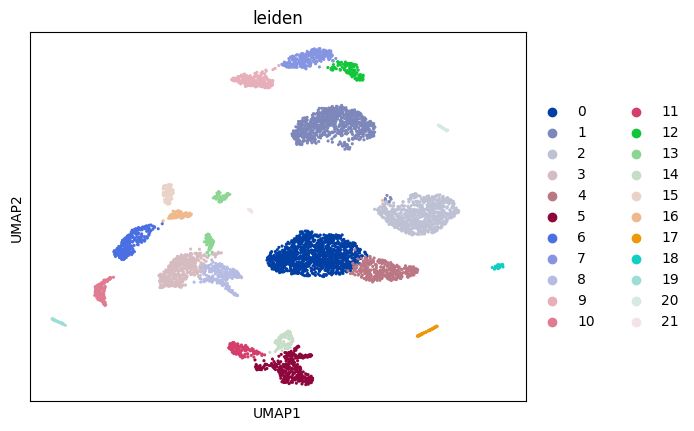

In [57]:
sc.pl.umap(adata, color=['leiden'])

In [ ]:
#Integration of all samples skipping
#but picking up finding markers

In [58]:
adata

AnnData object with n_obs × n_vars = 5960 × 2000
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'leiden'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [59]:
adata.obs

,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,leiden
CGTTCTGGTACTAGCT-1_1,2434,6047.0,6.0,0.099223,1.0,0.016537,2
CTGGCAGGTTCGGTAT-1_1,2444,5899.0,307.0,5.204272,5.0,0.084760,2
ACACCAACACAACGCC-1_1,2451,5497.0,0.0,0.000000,3.0,0.054575,1
CCTCAACCATACAGGG-1_1,2276,5434.0,38.0,0.699301,0.0,0.000000,11
ACAAAGATCCACAGGC-1_1,2310,5504.0,1.0,0.018169,1.0,0.018169,2
...,...,...,...,...,...,...,...
CGCCATTGTTTGCCGG-1_1,355,410.0,3.0,0.731707,0.0,0.000000,6
CACTGGGGTCTACGTA-1_1,346,403.0,0.0,0.000000,0.0,0.000000,1
CATACTTGTAGAGGAA-1_1,360,410.0,2.0,0.487805,0.0,0.000000,0
TTTGGTTTCCACGGAC-1_1,299,405.0,0.0,0.000000,2.0,0.493827,12


In [60]:
sc.pp.filter_genes(adata, min_cells = 10)

In [61]:
adata.X

array([[ 6.4572911e-03, -2.3643151e-03, -6.5741992e-06, ...,
         3.5232189e-01, -7.0990843e-01,  1.3351233e+00],
       [ 6.9041550e-02, -1.1616343e-03, -4.1264448e-01, ...,
         2.1026477e-01, -1.3117269e+00,  1.8589048e-01],
       [-1.4515667e-02, -2.8503814e-03,  1.2203571e-02, ...,
        -7.2587639e-01, -6.2778956e-01, -4.0658048e-01],
       ...,
       [-5.3554736e-02, -3.6773667e-02, -1.5890282e-02, ...,
         3.4993136e+00, -2.2142138e-01,  3.5205376e+00],
       [-2.2122513e-01, -1.6997649e-03,  5.5718489e-02, ...,
        -4.0984645e-01, -4.2726225e-01, -3.0938610e-01],
       [-6.1806031e-02, -3.6505669e-02,  2.3996728e-02, ...,
        -8.3443306e-02,  3.2564409e-02, -1.6175218e-01]], dtype=float32)

In [67]:
import scipy

In [68]:
adata.obs.head()

,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,leiden
CGTTCTGGTACTAGCT-1_1,2434,6047.0,6.0,0.099223,1.0,0.016537,2
CTGGCAGGTTCGGTAT-1_1,2444,5899.0,307.0,5.204272,5.0,0.084760,2
ACACCAACACAACGCC-1_1,2451,5497.0,0.0,0.000000,3.0,0.054575,1
CCTCAACCATACAGGG-1_1,2276,5434.0,38.0,0.699301,0.0,0.000000,11
ACAAAGATCCACAGGC-1_1,2310,5504.0,1.0,0.018169,1.0,0.018169,2


In [70]:
pip install --user scikit-misc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 32.2 MB/s eta 0:00:00


In [75]:
pip install scvi-colab

In [76]:
adata

AnnData object with n_obs × n_vars = 5960 × 1977
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'leiden'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [77]:
sc.pp.filter_genes(adata, min_cells = 10)

In [79]:
adata.X

array([[ 6.4572911e-03, -2.3643151e-03, -6.5741992e-06, ...,
         3.5232189e-01, -7.0990843e-01,  1.3351233e+00],
       [ 6.9041550e-02, -1.1616343e-03, -4.1264448e-01, ...,
         2.1026477e-01, -1.3117269e+00,  1.8589048e-01],
       [-1.4515667e-02, -2.8503814e-03,  1.2203571e-02, ...,
        -7.2587639e-01, -6.2778956e-01, -4.0658048e-01],
       ...,
       [-5.3554736e-02, -3.6773667e-02, -1.5890282e-02, ...,
         3.4993136e+00, -2.2142138e-01,  3.5205376e+00],
       [-2.2122513e-01, -1.6997649e-03,  5.5718489e-02, ...,
        -4.0984645e-01, -4.2726225e-01, -3.0938610e-01],
       [-6.1806031e-02, -3.6505669e-02,  2.3996728e-02, ...,
        -8.3443306e-02,  3.2564409e-02, -1.6175218e-01]], dtype=float32)

In [80]:
adata.write_h5ad('combined.h5ad')

In [81]:
adata = sc.read_h5ad('combined.h5ad')
adata

AnnData object with n_obs × n_vars = 5960 × 1977
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'leiden'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [83]:
sc.pp.filter_genes(adata, min_cells = 100)

In [84]:
adata

AnnData object with n_obs × n_vars = 5960 × 1698
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'leiden'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [85]:
adata.layers['counts'] = adata.X.copy()

In [86]:
sc.pp.normalize_total(adata, target_sum = 1e4)
sc.pp.log1p(adata)
adata.raw = adata

/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_normalization.py:196: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))
/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_simple.py:351: RuntimeWarning: invalid value encountered in log1p
  np.log1p(X, out=X)


In [87]:
adata.obs.head()

,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,leiden
CGTTCTGGTACTAGCT-1_1,2434,6047.0,6.0,0.099223,1.0,0.016537,2
CTGGCAGGTTCGGTAT-1_1,2444,5899.0,307.0,5.204272,5.0,0.084760,2
ACACCAACACAACGCC-1_1,2451,5497.0,0.0,0.000000,3.0,0.054575,1
CCTCAACCATACAGGG-1_1,2276,5434.0,38.0,0.699301,0.0,0.000000,11
ACAAAGATCCACAGGC-1_1,2310,5504.0,1.0,0.018169,1.0,0.018169,2


In [95]:
!pip install --upgrade scikit-misc
import skmisc

!pip install --upgrade --target=/usr/local/lib/python3.10/dist-packages scikit-misc



  Using cached scikit_misc-0.3.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.8 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 26.7 MB/s eta 0:00:00


In [94]:
import sys
sys.path.append('/root/.local/lib/python3.10/site-packages')

import skmisc
